In [1]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 17.9 MB/s 
     |████████████████████████████████| 233 kB 39.9 MB/s 
     |████████████████████████████████| 1.4 MB 52.4 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=824cd81a7bbae99c7ab5e9f2c768d9ff97c5aa5c5cbddf2d16d8087ad4446747
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154674 sha256=d45bcf04c24ad972b9aa35fd609513536af91df1803bee035cb29439130eea85
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


## import libraries

In [2]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import string
import re


import torch
from torch import nn
from torch.utils.data import Dataset
from tqdm import tqdm
torch.cuda.empty_cache()

import random

from hazm import word_tokenize

In [3]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
# to render higher resolution images
%config InlineBackend.figure_format='retina'
# setting the default values for plots
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
# make sure the fig size is not too big
rcParams['figure.figsize'] = 16, 10

In [4]:
import re

def remove_arabic(text):
    # remove arabic alphabet
    mapping = {
        u"ۀ" : u"ه",
        u"ة" : u"ت",
        u"ي" : u"ی",
        u"ؤ" : u"و",
        u"إ" : u"ا",
        u"ٹ" : u"ت",
        u"ڈ" : u"د",
        u"ئ" : u"ی",
        u"ﻨ" : u"ن",
        u"ﺠ" : u"ج",
        u"ﻣ" : u"م",
        u"ﷲ" : u"",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ٱ" : u"ا",
        u"ڵ" : u"ل",
        u"ﭘ" : u"پ",
        u"ﻪ" : u"ه",
        u"ﻳ" : u"ی",
        u"ٻ" : u"ب",
        u"ں" : u"ن",
        u"ٶ" : u"و",
        u"ٲ" : u"ا",
        u"ہ" : u"ه",
        u"ﻩ" : u"ه",
        u"ﻩ" : u"ه",
        u"ك" : u"ک",
        u"ﺆ" : u"و",
        u"أ" : u"ا",
        u"ﺪ" : u"د"
    }
    arabic_keys =  re.compile(r"(" + "|".join(mapping.keys()) + r")")
    return arabic_keys.sub(lambda x: mapping[x.group()], text)


# clean_text function
def clean_text(text, allspace=True, punc=True, sentence=True, only_persian=True):

    #remove halph space, new line ('\n') and '\r'
    text = text.replace('\u200c', ' ').replace('\u200e', ' ').replace(u'\xad', u' ').replace(u'\xa0', u' ').replace('_x000D_\n',' ').replace('\n', ' ').replace('\r', ' ').replace('[n]',' ')

    # remove arabic letters
    text = remove_arabic(text)
    # convert spaces to a one space and delete leading and trailing spaces
    text = re.sub("(\s)+", " ", text)
    text = text.strip()
    return text

## Tasnim

### download

In [5]:
!gdown 1J7WwW-zP26vowMgHYnYeLhsdN0xaxAYA

Downloading...
From: https://drive.google.com/uc?id=1J7WwW-zP26vowMgHYnYeLhsdN0xaxAYA
To: /content/tasnim.zip
100% 88.8M/88.8M [00:02<00:00, 38.3MB/s]


### read data

In [6]:
!unzip tasnim.zip

Archive:  tasnim.zip
  inflating: tasnim.csv              


In [7]:
Tasnim = pd.read_csv('tasnim.csv')

In [8]:
Tasnim.head()

category  \
0    سیاسی   
1    سیاسی   
2    سیاسی   
3    سیاسی   
4    سیاسی   

                                                                      title  \
0                             میرکاظمی: زمان حذف ارز ۴۲۰۰ تومانی مشخص نیست    
1   طرح ۲ فوریتی شفافیت قوای سه‌گانه با ۲۰۰ امضا تقدیم هیئت رئیسه شد + متن    
2                         رئیسی انتخاب نخست وزیر جدید پاکستان را تبریک گفت    
3                 اصلاح اساسنامه شرکت شهر فرودگاهی امام خمینی (ره) در دولت    
4            ارائه طرحی کلی و مبهم برای شفافیت فرار از مطالبه بحق مردم است    

                                                                                                                                                                                                          abstract  \
0   رئیس سازمان برنامه و بودجه گفت: هر زمان شرایط و فضای اقتصادی کشور مساعد باشد، می‌توان به تدریج حذف ارز ترجیحی را عملیاتی کرد و در حال حاضر برای حذف ارز ۴۲۰۰ تومانی زمان و تاریخ مشخصی را نمی‌توان تعیین کرد.    
1                                                     نماینده نیشابور در مجلس از ارائه طرح ۲ فوریتی شفافیت قوای سه‌گانه دستگاه‌های اجرایی و نهادهای عمومی غیردولتی با بیش از ۲۰۰ امضا به هیئت رئیسه مجلس خبر داد.    
2                                                                                                                                         رئیس جمهور کشورمان طی پیامی انتخاب نخست وزیر جدید پاکستان را تبریک گفت.    
3                                                                                                                                         اساسنامه شرکت شهر فرودگاهی امام خمینی(ره) در جلسه هیئت وزیران اصلاح شد.    
4                                      نماینده مردم تهران گفت: در شرایطی که طرح شفافیت آرای نمایندگان معطل در دستور کار قرار گرفتن است، ارائه طرحی کلی و مبهم برای شفافیت، به نوعی فرار از مطالبه به‌حق مردم است.    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

### rename columns and remove nan and duplicate




In [9]:
Tasnim_train = Tasnim[['body', 'abstract']]
Tasnim_train.columns = ['text', 'summary']

In [10]:
Tasnim_train.shape

(63494, 2)

In [11]:
Tasnim_train = Tasnim_train.dropna()
Tasnim_train.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
Tasnim_train.dropna(axis=0,inplace=True)   #dropping na

In [12]:
Tasnim_train.shape

(59980, 2)

### cleaning

In [13]:
Tasnim_train['cleaned_text'] = Tasnim_train['text'].apply(lambda t: clean_text(t))
Tasnim_train['cleaned_summary'] = Tasnim_train['summary'].apply(lambda t: clean_text(t))

### Calculate number of words in text and summary

In [14]:
Tasnim_train["News_Length"] = Tasnim_train["cleaned_text"].apply(lambda sent: len(word_tokenize(sent)))
Tasnim_train["Summarization_Length"] = Tasnim_train["cleaned_summary"].apply(lambda sent: len(word_tokenize(sent)))

### statistical info

In [15]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(word_tokenize(d)) for d in longs)
    length_shorts = list(len(word_tokenize(d)) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(Tasnim_train['cleaned_summary'].to_list(), Tasnim_train['cleaned_text'].to_list(), 90)

percentile 90 of length of news: 1316.0
longest sentence:  19446

percentile 90 of length of summaries: 47.0
longest sentence:  69



### Remove rows which number of words in summary are greater then the number of text words.

In [16]:
data_clean = Tasnim_train[(Tasnim_train["News_Length"] > 100) & 
                          (Tasnim_train["News_Length"] < 1500) & 
                          (Tasnim_train["Summarization_Length"] > 5) &
                          (Tasnim_train["Summarization_Length"] < Tasnim_train["News_Length"])]

In [17]:
data_clean.shape

(51880, 6)

In [18]:
train_df = data_clean[['cleaned_text', 'cleaned_summary','News_Length','Summarization_Length']]
train_df.columns = ['News', 'Summarization','News_Length','Summarization_Length']

In [19]:
train_df.head()

News  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### save data

In [20]:
train_df.to_csv('Tasnim.csv')

### chart for data

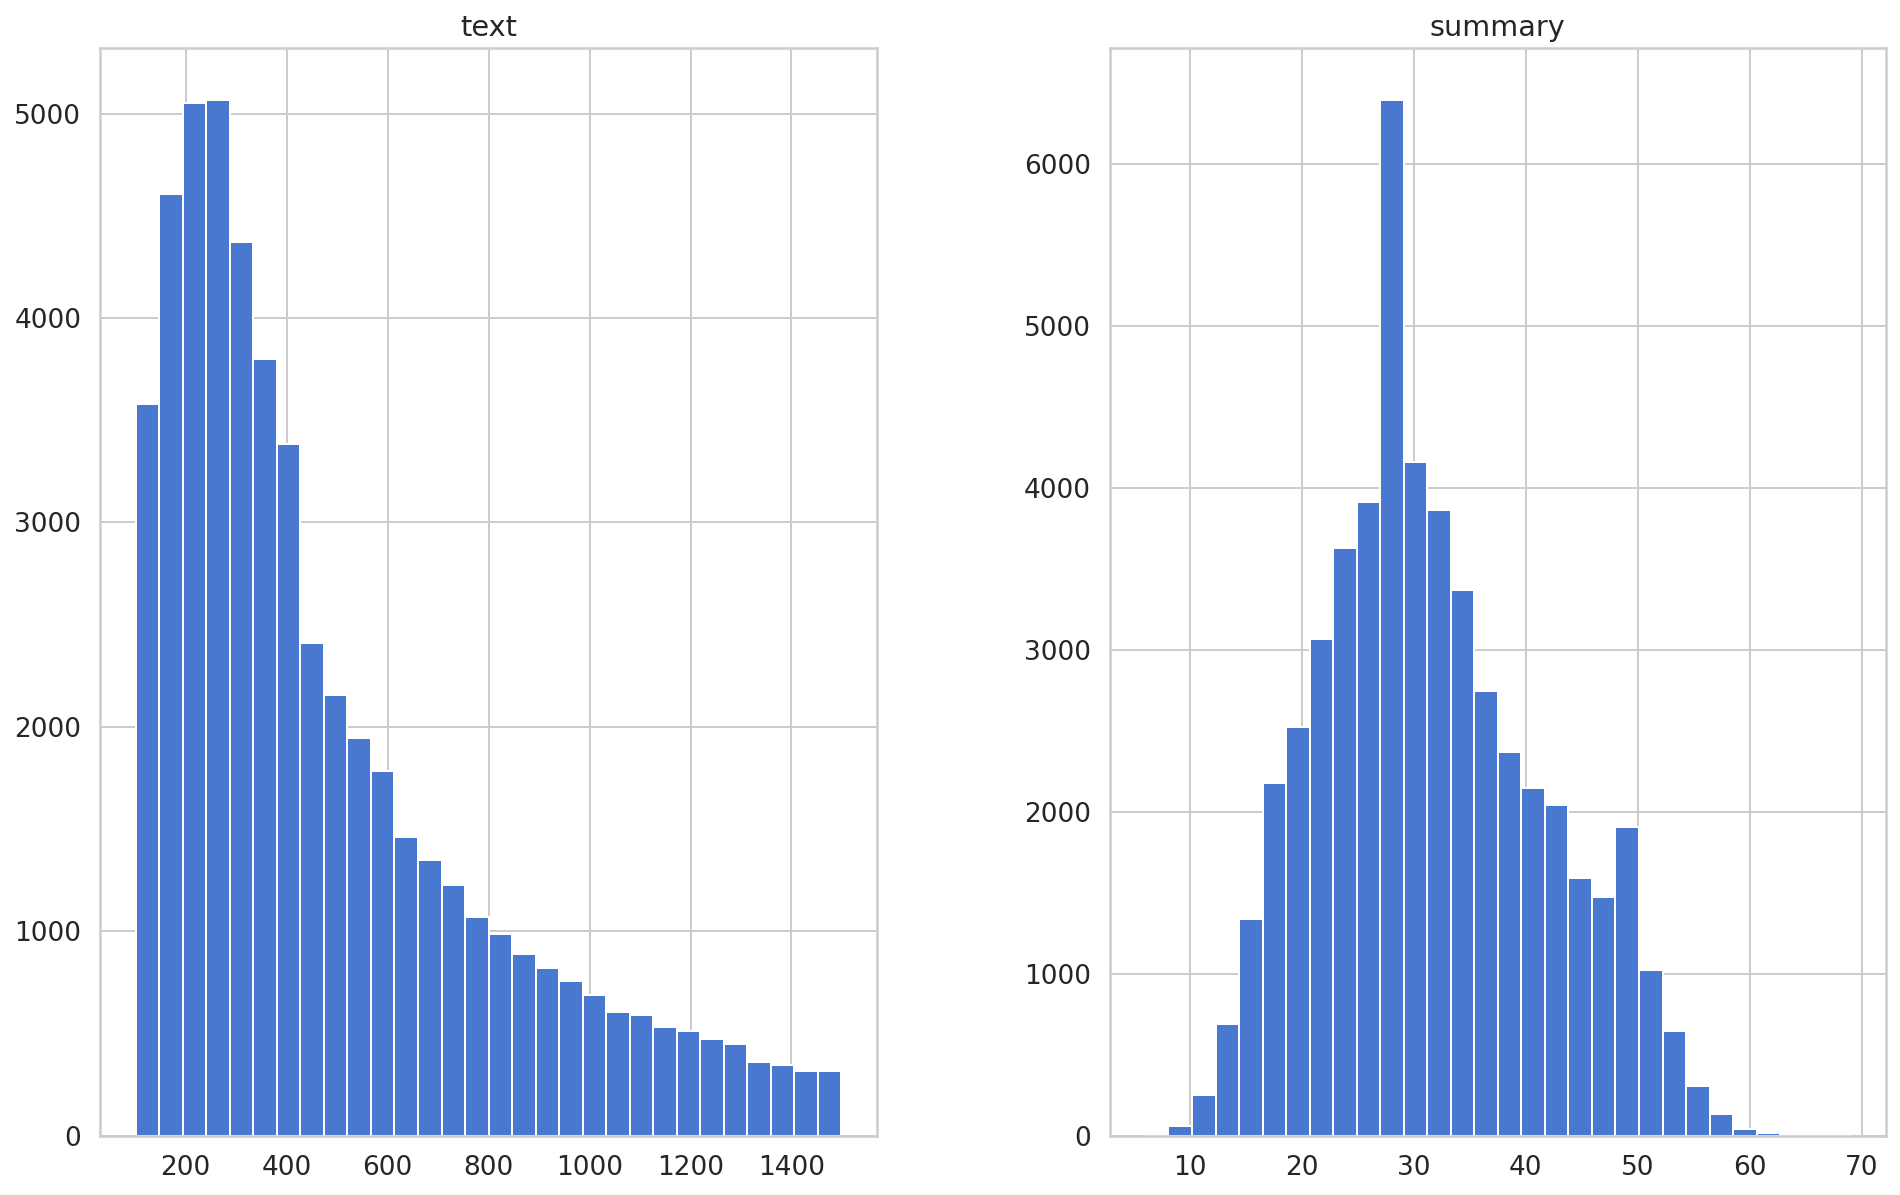

In [21]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train_df['News']:
      text_word_count.append(len(word_tokenize(i)))

for i in train_df['Summarization']:
      summary_word_count.append(len(word_tokenize(i)))

length_data = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_data.hist(bins = 30)
plt.show()

## Asr Iran

### download

In [22]:
!gdown 1yYgSi3tNv6mYKmCwcsNHuzHH0HCikxPF

Downloading...
From: https://drive.google.com/uc?id=1yYgSi3tNv6mYKmCwcsNHuzHH0HCikxPF
To: /content/asriran.zip
100% 287M/287M [00:07<00:00, 36.5MB/s]


### read data

In [23]:
!unzip asriran.zip

Archive:  asriran.zip
  inflating: asriran.csv             


In [24]:
Asriran_train = pd.read_csv('asriran.csv')

In [25]:
Asriran_train.head()

,title,shortlink,time,service,subgroup,abstract,body
0,پلیس: جرائم خشن و مسلحانه در تهران کاهش یافته است,https://www.asriran.com/003YoB,۰۸:۴۱ - ۲۳ تير ۱۴۰۱,صفحه نخست,عمومی,آمارهای پلیس نشان می‌دهد که جرائم خشن و مسلحانه در تهران کاهش داشته است,رئیس پلیس آگاهی تهران بزرگ اعلام کرد که موضوع سرقت مسلحانه از مشاور رئیس فدراسیون کشتی در حال پیگیری است. به گزارش ایسنا، روز دوشنبه خبری مبنی بر «تیراندازی به مشاور علیرضا دبیر و سرقت لندکروز» منتشر و اعلام شد که «علی صفایی، مشاور علیرضا دبیر و مربی سابق تیم ملی کشتی آزاد نوجوانان هدف سرقت مسلحانه در اتوبان امام علی (ع) تهران قرار گرفت و چهارسارق مسلح علاوه بر اینکه خودروی تویوتا لندکروز او را به سرقت بردند، به پای چپ او نیز دو مرتبه شلیک کرده‌اند.» درپی انتشار خبر این حادثه، سرهنگ علی ولیپور گودرزی، رئیس پلیس آگاهی تهران بزرگ در گفت‌وگو با ایسنا، از پیگیری این موضوع از سوی ماموران این پلیس خبرداد و گفت:موضوعی که رخ داده بحث سرقت بوده که همکاران من از همان لحظه اولی که وقوع حادثه به پلیس اطلاع داده شد، در صحنه حاضر شده و موضوع را پیگیری کردند. البته این رویه‌ای است که در مورد تمام جرائم و سرقت‌ها وجود دارد و در حال حاضر نیز پیگیری‌ها و تحقیقات درباره این پرونده از سوی کارآگاهان پلیس آگاهی در حال انجام است. وی در پاسخ به این پرسش که آیا جرائم خشن و مسلحانه در پایتخت افزایش داشته یا خیر نیز گفت:‌ گاهی اخبار بد در فضای مجازی منعکس و اینطور تصور می‌شود که جرمی افزایش داشته است، از نظر ما به عنوان پلیس حتی وقوع یک جرم نیز زیاد است و نباید رخ دهد، اما اگر جرمی هم رخ دهد قطعا به فوریت مورد رسیدگی قرار خواهد گرفت. رییس پلیس آگاهی تهران بزرگ ادامه داد:‌در این راستا باید بگویم که انتشار گسترده یک خبر از یک اقدام مجرمانه به معنای افزایش آمار آن جرم نیست. آمارهای ما نشان می‌دهد که جرائم خشن و مسلحانه در تهران کاهش داشته است و علاوه بر آن قدرت کشف پلیس نیز در این جرائم افزایش یافته و هم فاصله وقوع تا کشف کمتر شده و هم تعداد مواردی که کشف شده بیشتر شده است.
1,"وزیر بهداشت:\r\nآغاز اجرای طرح جامع ""دارویار""/ افزایش پوشش بیمه‌ای داروها",https://www.asriran.com/003YoC,۰۸:۴۷ - ۲۳ تير ۱۴۰۱,صفحه نخست,اخبار سلامت,هدف اصلی وزارت بهداشت از این طرح این است که پوشش بیمه‌ای داروها را افزایش دهیم.,"وزیر بهداشت جزییات طرح ""دارویار"" که اجرای آن آغاز شده است را تشریح کرد. به گزارش ایسنا ، دکتر عین‌اللهی با اشاره به موفقیت کشور در مقابله با کرونا و کنترل این بیماری، درباره طرح ارتقای بیمه‌ها و کارایی بیشتر بیمه‌ها گفت: این طرح از بیمه همگانی شروع شده است و مجلس شورای اسلامی اعتبار خوبی بالغ بر ۶ هزار میلیارد تومان برای بیمه همگانی در نظر گرفته و بر اساس آن حدود ۶ میلیون نفر به جمعیت تحت پوشش بیمه همگانی اضافه شدند. وی افزود: بر این اساس، زیرساخت بیمه‌ها در این مدت تامین شد. همچنین مجلس شورای اسلامی ۵ هزار میلیارد تومان نیز بابت حمایت از دارو و درمان بیماری‌های خاص در نظر گرفته است. وزیر بهداشت با اشاره به طرح دارویار ادامه داد: این طرح جامع آغاز شده است. در قالب این طرح تعداد داروهای تحت پوشش بیمه، افزایش یافته است؛ به‌طوری‌که ۱۰۰ قلم داروی پر مصرف را که قبلاً بیمه نبودند تحت پوشش بیمه قرار دادیم. به این ترتیب داروهایی مانند داروهای سرماخوردگی، دیفن هیدرامین و غیره که قبلا بیمه نبودند جزو بیمه قرار گرفتند. عین‌اللهی تاکید کرد: هدف اصلی وزارت بهداشت از این طرح این است که پوشش بیمه‌ای داروها را افزایش دهیم. در این طرح باتوجه به دستوری که ریاست جمهور دادند، اعتبار بسیار خوبی برای بیمه‌ها در نظر گرفته شده تا بتواند مخارج مربوط به داروهای بیماران را تامین کند. انشاءالله این طرح را در کل کشور اجرا می‌کنیم و هدف این است که بتوانیم هزینه‌های مربوط به بیماران را در کل کشور تامین کنیم. در ادامه طرح هم هدف این است که پوشش بیمه‌ای اکثر داروها را انجام دهیم و وقتی بیماران به مراکز درمانی و داروخانه‌ها مراجعه می‌کنند، هیچ تغییری در پرداخت هزینه‌های دارویی‌شان نداشته باشند. وزیر بهداشت تاکید کرد: بنابراین ثابت ماندن پرداخت از جیب بیماران از اهداف این طرح بوده است. متاسفانه در سال‌های قبل وضعیت به گونه‌ای بود که پرداخت از جیب بیماران افزایش پیدا کرد. در حالی که هدف اصلی از این طرح این است که به تدریج پرداخت از جیب بیماران را به ویژه در حوزه دارو که برای بیماران ضروری است، کاهش دهیم و ان‌شاءالله دولت بتواند مخارج مربوط به داروی بیماران را تامین کند."
2,وزارت بهداشت: قیمت دارو برای مصرف کننده ثابت می‌ماند,https://www.asriran.com/00

### rename columns and remove nan and duplicate




In [26]:
Asriran_train = Asriran_train[['body', 'abstract']]
Asriran_train.columns = ['text', 'summary']

In [27]:
Asriran_train.shape

(339834, 2)

In [28]:
Asriran_train = Asriran_train.dropna()
Asriran_train.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
Asriran_train.dropna(axis=0,inplace=True)   #dropping na

In [29]:
Asriran_train.shape

(127698, 2)

### cleaning

In [30]:
Asriran_train['cleaned_text'] = Asriran_train['text'].apply(lambda t: clean_text(t))
Asriran_train['cleaned_summary'] = Asriran_train['summary'].apply(lambda t: clean_text(t))

### Calculate number of words in text and summary 

In [31]:
Asriran_train["News_Length"] = Asriran_train["cleaned_text"].apply(lambda sent: len(word_tokenize(sent)))
Asriran_train["Summarization_Length"] = Asriran_train["cleaned_summary"].apply(lambda sent: len(word_tokenize(sent)))

### statistical info

In [32]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(word_tokenize(d)) for d in longs)
    length_shorts = list(len(word_tokenize(d)) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(Asriran_train['cleaned_summary'].to_list(), Asriran_train['cleaned_text'].to_list(), 90)

percentile 90 of length of news: 1015.0
longest sentence:  19069

percentile 90 of length of summaries: 52.0
longest sentence:  682



### Remove rows which number of words in summary are greater then the number of text words.

In [33]:
data_clean = Asriran_train[(Asriran_train["News_Length"] > 100) & 
                          (Asriran_train["News_Length"] < 1200) & 
                          (Asriran_train["Summarization_Length"] > 5) &
                          (Asriran_train["Summarization_Length"] < Asriran_train["News_Length"])]

In [34]:
data_clean.shape

(96283, 6)

In [35]:
train_df = data_clean[['cleaned_text', 'cleaned_summary','News_Length','Summarization_Length']]
train_df.columns = ['News', 'Summarization','News_Length','Summarization_Length']

In [36]:
train_df.head()

,News,Summarization,News_Length,Summarization_Length
0,رییس پلیس آگاهی تهران بزرگ اعلام کرد که موضوع سرقت مسلحانه از مشاور رییس فدراسیون کشتی در حال پیگیری است. به گزارش ایسنا، روز دوشنبه خبری مبنی بر «تیراندازی به مشاور علیرضا دبیر و سرقت لندکروز» منتشر و اعلام شد که «علی صفایی، مشاور علیرضا دبیر و مربی سابق تیم ملی کشتی آزاد نوجوانان هدف سرقت مسلحانه در اتوبان امام علی (ع) تهران قرار گرفت و چهارسارق مسلح علاوه بر اینکه خودروی تویوتا لندکروز او را به سرقت بردند، به پای چپ او نیز دو مرتبه شلیک کرده اند.» درپی انتشار خبر این حادثه، سرهنگ علی ولیپور گودرزی، رییس پلیس آگاهی تهران بزرگ در گفت وگو با ایسنا، از پیگیری این موضوع از سوی ماموران این پلیس خبرداد و گفت:موضوعی که رخ داده بحث سرقت بوده که همکاران من از همان لحظه اولی که وقوع حادثه به پلیس اطلاع داده شد، در صحنه حاضر شده و موضوع را پیگیری کردند. البته این رویه ای است که در مورد تمام جرایم و سرقت ها وجود دارد و در حال حاضر نیز پیگیری ها و تحقیقات درباره این پرونده از سوی کارآگاهان پلیس آگاهی در حال انجام است. وی در پاسخ به این پرسش که آیا جرایم خشن و مسلحانه در پایتخت افزایش داشته یا خیر نیز گفت: گاهی اخبار بد در فضای مجازی منعکس و اینطور تصور می شود که جرمی افزایش داشته است، از نظر ما به عنوان پلیس حتی وقوع یک جرم نیز زیاد است و نباید رخ دهد، اما اگر جرمی هم رخ دهد قطعا به فوریت مورد رسیدگی قرار خواهد گرفت. رییس پلیس آگاهی تهران بزرگ ادامه داد: در این راستا باید بگویم که انتشار گسترده یک خبر از یک اقدام مجرمانه به معنای افزایش آمار آن جرم نیست. آمارهای ما نشان می دهد که جرایم خشن و مسلحانه در تهران کاهش داشته است و علاوه بر آن قدرت کشف پلیس نیز در این جرایم افزایش یافته و هم فاصله وقوع تا کشف کمتر شده و هم تعداد مواردی که کشف شده بیشتر شده است.,آمارهای پلیس نشان می دهد که جرایم خشن و مسلحانه در تهران کاهش داشته است,348,14
1,"وزیر بهداشت جزییات طرح ""دارویار"" که اجرای آن آغاز شده است را تشریح کرد. به گزارش ایسنا ، دکتر عین اللهی با اشاره به موفقیت کشور در مقابله با کرونا و کنترل این بیماری، درباره طرح ارتقای بیمه ها و کارایی بیشتر بیمه ها گفت: این طرح از بیمه همگانی شروع شده است و مجلس شورای اسلامی اعتبار خوبی بالغ بر ۶ هزار میلیارد تومان برای بیمه همگانی در نظر گرفته و بر اساس آن حدود ۶ میلیون نفر به جمعیت تحت پوشش بیمه همگانی اضافه شدند. وی افزود: بر این اساس، زیرساخت بیمه ها در این مدت تامین شد. همچنین مجلس شورای اسلامی ۵ هزار میلیارد تومان نیز بابت حمایت از دارو و درمان بیماری های خاص در نظر گرفته است. وزیر بهداشت با اشاره به طرح دارویار ادامه داد: این طرح جامع آغاز شده است. در قالب این طرح تعداد داروهای تحت پوشش بیمه، افزایش یافته است؛ به طوری که ۱۰۰ قلم داروی پر مصرف را که قبلاً بیمه نبودند تحت پوشش بیمه قرار دادیم. به این ترتیب داروهایی مانند داروهای سرماخوردگی، دیفن هیدرامین و غیره که قبلا بیمه نبودند جزو بیمه قرار گرفتند. عین اللهی تاکید کرد: هدف اصلی وزارت بهداشت از این طرح این است که پوشش بیمه ای داروها را افزایش دهیم. در این طرح باتوجه به دستوری که ریاست جمهور دادند، اعتبار بسیار خوبی برای بیمه ها در نظر گرفته شده تا بتواند مخارج مربوط به داروهای بیماران را تامین کند. انشاءالله این طرح را در کل کشور اجرا می کنیم و هدف این است که بتوانیم هزینه های مربوط به بیماران را در کل کشور تامین کنیم. در ادامه طرح هم هدف این است که پوشش بیمه ای اکثر داروها را انجام دهیم و وقتی بیماران به مراکز درمانی و داروخانه ها مراجعه می کنند، هیچ تغییری در پرداخت هزینه های دارویی شان نداشته باشند. وزیر بهداشت تاکید کرد: بنابراین ثابت ماندن پرداخت از جیب بیماران از اهداف این طرح بوده است. متاسفانه در سال های قبل وضعیت به گونه ای بود که پرداخت از جیب بیماران افزایش پیدا کرد. در حالی که هدف اصلی از این طرح این است که به تدریج پرداخت از جیب بیماران را به ویژه در حوزه دارو که برای بیماران ضروری است، کاهش دهیم و ان شاءالله دولت بتواند مخارج مربوط به داروی بیماران را تامین کند.",هدف اصلی وزارت بهداشت از این طرح این است که پوشش بیمه ای داروها را افزایش دهیم.,402,18
3,معاون رییس جمهور گفت: دولت برنامه های راهبردی اساسی در حوزه داخلی و خارجی در دست اجرا دارد که قطعا مردم به زودی شاهد اثرات مثبت این اقدامات خواهند بود. به گزارش ایسنا؛ سید محمد حسینی با همراهی استاندار گیلان با آیت الله رسول فلاحتی، نماینده ولی فقیه در استان و امام جمعه رشت دیدار و گفت و گو کرد. معاون امور مجلس رییس جمهور در این دید

### save data

In [37]:
train_df.to_csv('Asriran.csv')

### chart for data

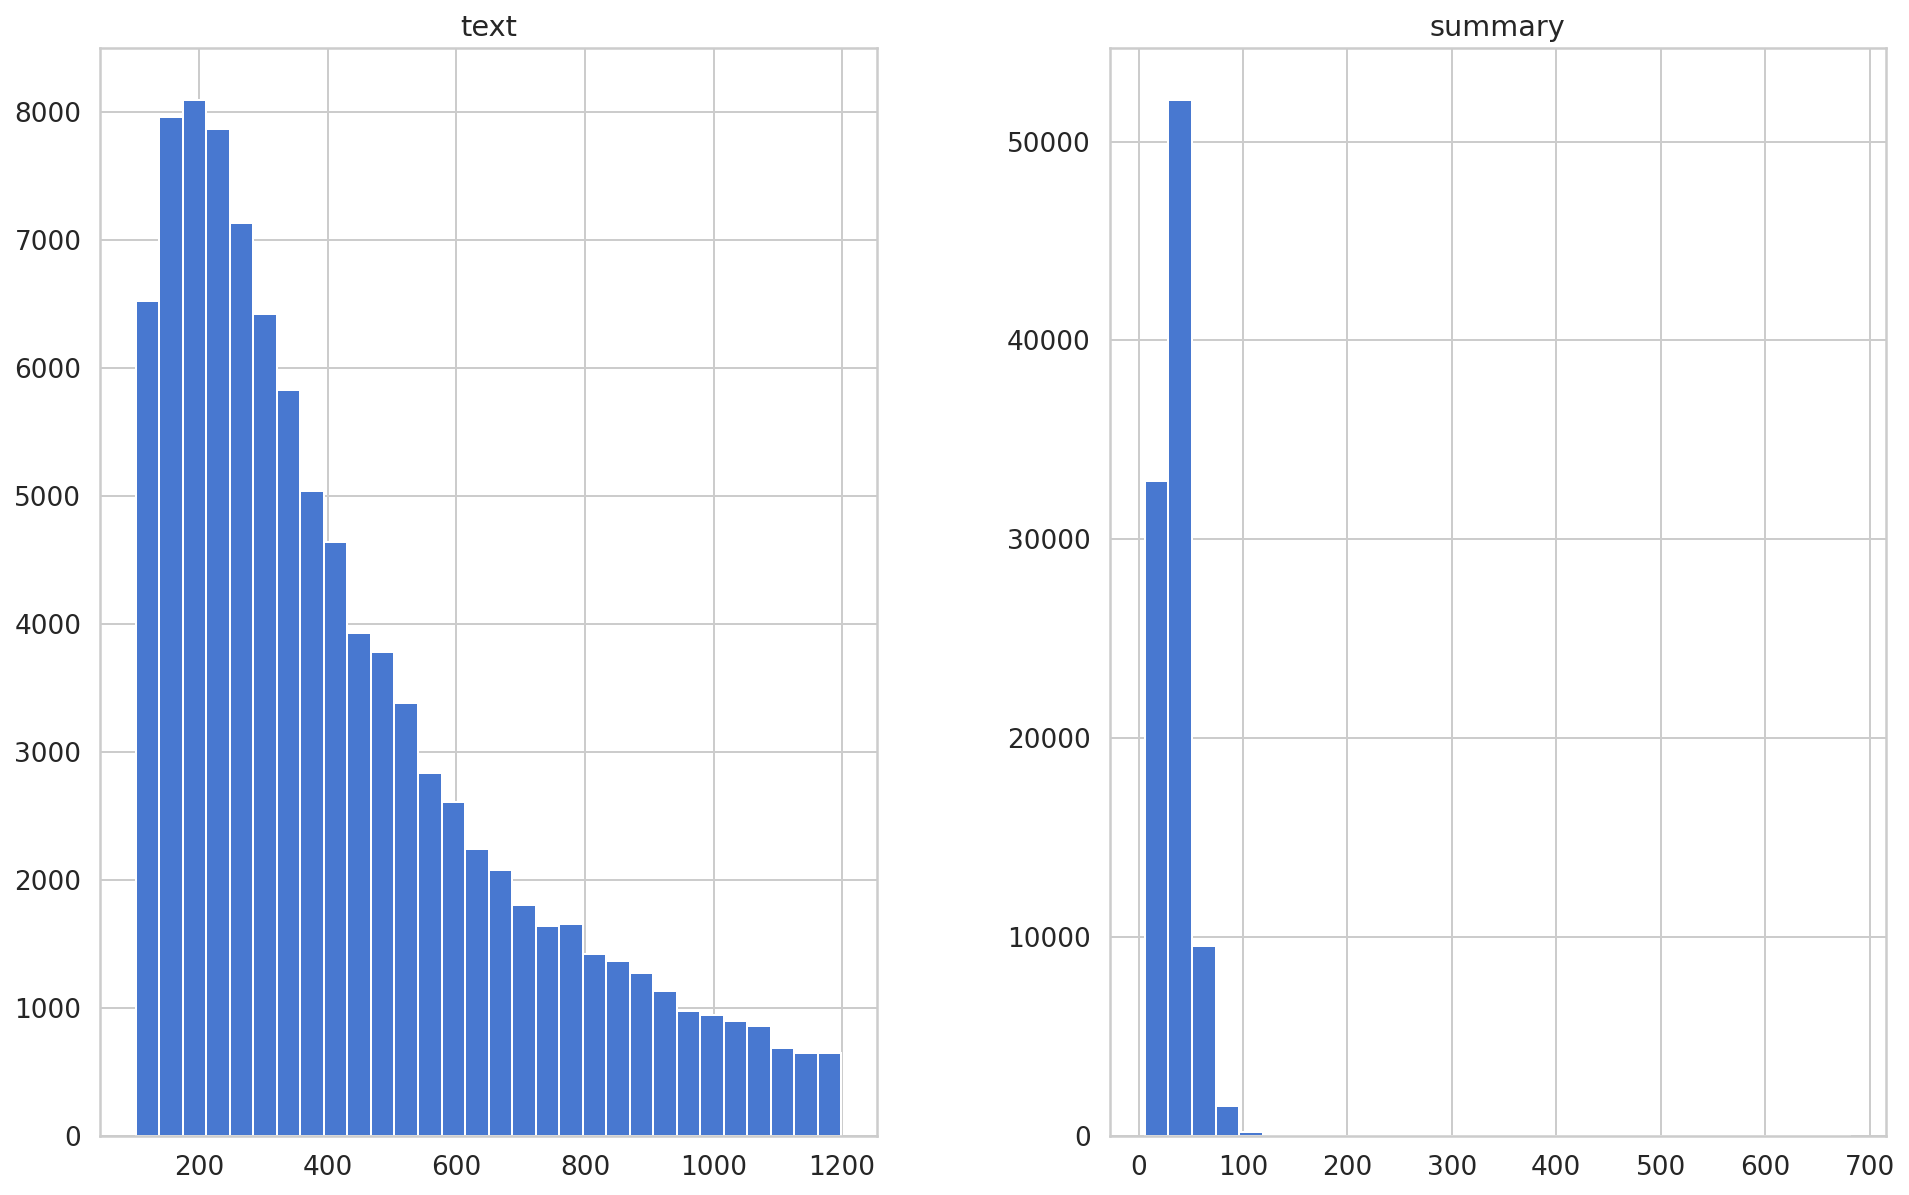

In [38]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train_df['News']:
      text_word_count.append(len(word_tokenize(i)))

for i in train_df['Summarization']:
      summary_word_count.append(len(word_tokenize(i)))

length_data = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_data.hist(bins = 30)
plt.show()

## Tebyan

### download

In [39]:
!gdown --id 1Rzon_Bl7jQ13IU0Hhda1Zfr5_lj2GDLA
!gdown --id 1XBtDNJtInhfHQBhoe3-R8M3WzhUE4vNZ
!gdown --id 1fd1doZNKjMPeKhZixyDfhZgVd47bdqq0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Rzon_Bl7jQ13IU0Hhda1Zfr5_lj2GDLA
To: /content/train.csv
100% 568M/568M [00:19<00:00, 29.6MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XBtDNJtInhfHQBhoe3-R8M3WzhUE4vNZ
To: /content/dev.csv
100% 49.8M/49.8M [00:02<00:00, 24.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dri

### read data

In [40]:
Tebyan_train = pd.read_csv('train.csv')
Tebyan_test = pd.read_csv('test.csv')
Tebyan_val = pd.read_csv('dev.csv')
Tebyan_train.reset_index(drop=True, inplace=True)
Tebyan_test.reset_index(drop=True, inplace=True)
Tebyan_val.reset_index(drop=True, inplace=True)

Tebyan_df = pd.concat( [Tebyan_train, Tebyan_test, Tebyan_val], axis=0) 

In [41]:
Tebyan_df.head()

Unnamed: 0                       _id  \
0        9083  60734b1a2c38301a358e4559   
1       53491  607360312c38301a358ef2d1   
2       34306  607357e52c38301a358ea7e0   
3       83655  60736d452c38301a358f68a5   
4       52678  60735fd22c38301a358eefa4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

### rename columns and remove nan and duplicate




In [42]:
Tebyan_df.shape

(92289, 4)

In [43]:
Tebyan_df = Tebyan_df[['article', 'summary']]
Tebyan_df.columns = ['text', 'summary']
Tebyan_df = Tebyan_df.dropna()
Tebyan_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
Tebyan_df.dropna(axis=0,inplace=True)   #dropping na

In [44]:
Tebyan_df.shape

(91369, 2)

### cleaning

In [45]:
Tebyan_df['cleaned_text'] = Tebyan_df['text'].apply(lambda t: clean_text(t))
Tebyan_df['cleaned_summary'] = Tebyan_df['summary'].apply(lambda t: clean_text(t))

### Calculate number of words in text and summary

In [46]:
Tebyan_df["News_Length"] = Tebyan_df["cleaned_text"].apply(lambda sent: len(word_tokenize(sent)))
Tebyan_df["Summarization_Length"] = Tebyan_df["cleaned_summary"].apply(lambda sent: len(word_tokenize(sent)))

In [47]:
Tebyan_df.shape

(91369, 6)

### statistical INFO

In [48]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(word_tokenize(d)) for d in longs)
    length_shorts = list(len(word_tokenize(d)) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(Tebyan_df['cleaned_summary'].to_list(), Tebyan_df['cleaned_text'].to_list(), 90)

percentile 90 of length of news: 1706.0
longest sentence:  50148

percentile 90 of length of summaries: 65.0
longest sentence:  242



### Remove rows which number of words in summary are greater then the number of text words.

In [49]:
data_clean = Tebyan_df[(Tebyan_df["News_Length"] > 100) & 
                          (Tebyan_df["News_Length"] < 1800) & 
                          (Tebyan_df["Summarization_Length"] > 5) &
                          (Tebyan_df["Summarization_Length"] < Tebyan_df["News_Length"])]

In [50]:
Tebyan_df.shape

(91369, 6)

In [51]:
train_df = data_clean[['cleaned_text', 'cleaned_summary','News_Length','Summarization_Length']]
train_df.columns = ['News', 'Summarization','News_Length','Summarization_Length']

### save data

In [52]:
train_df.to_csv('Tebyan.csv')

### chart for data

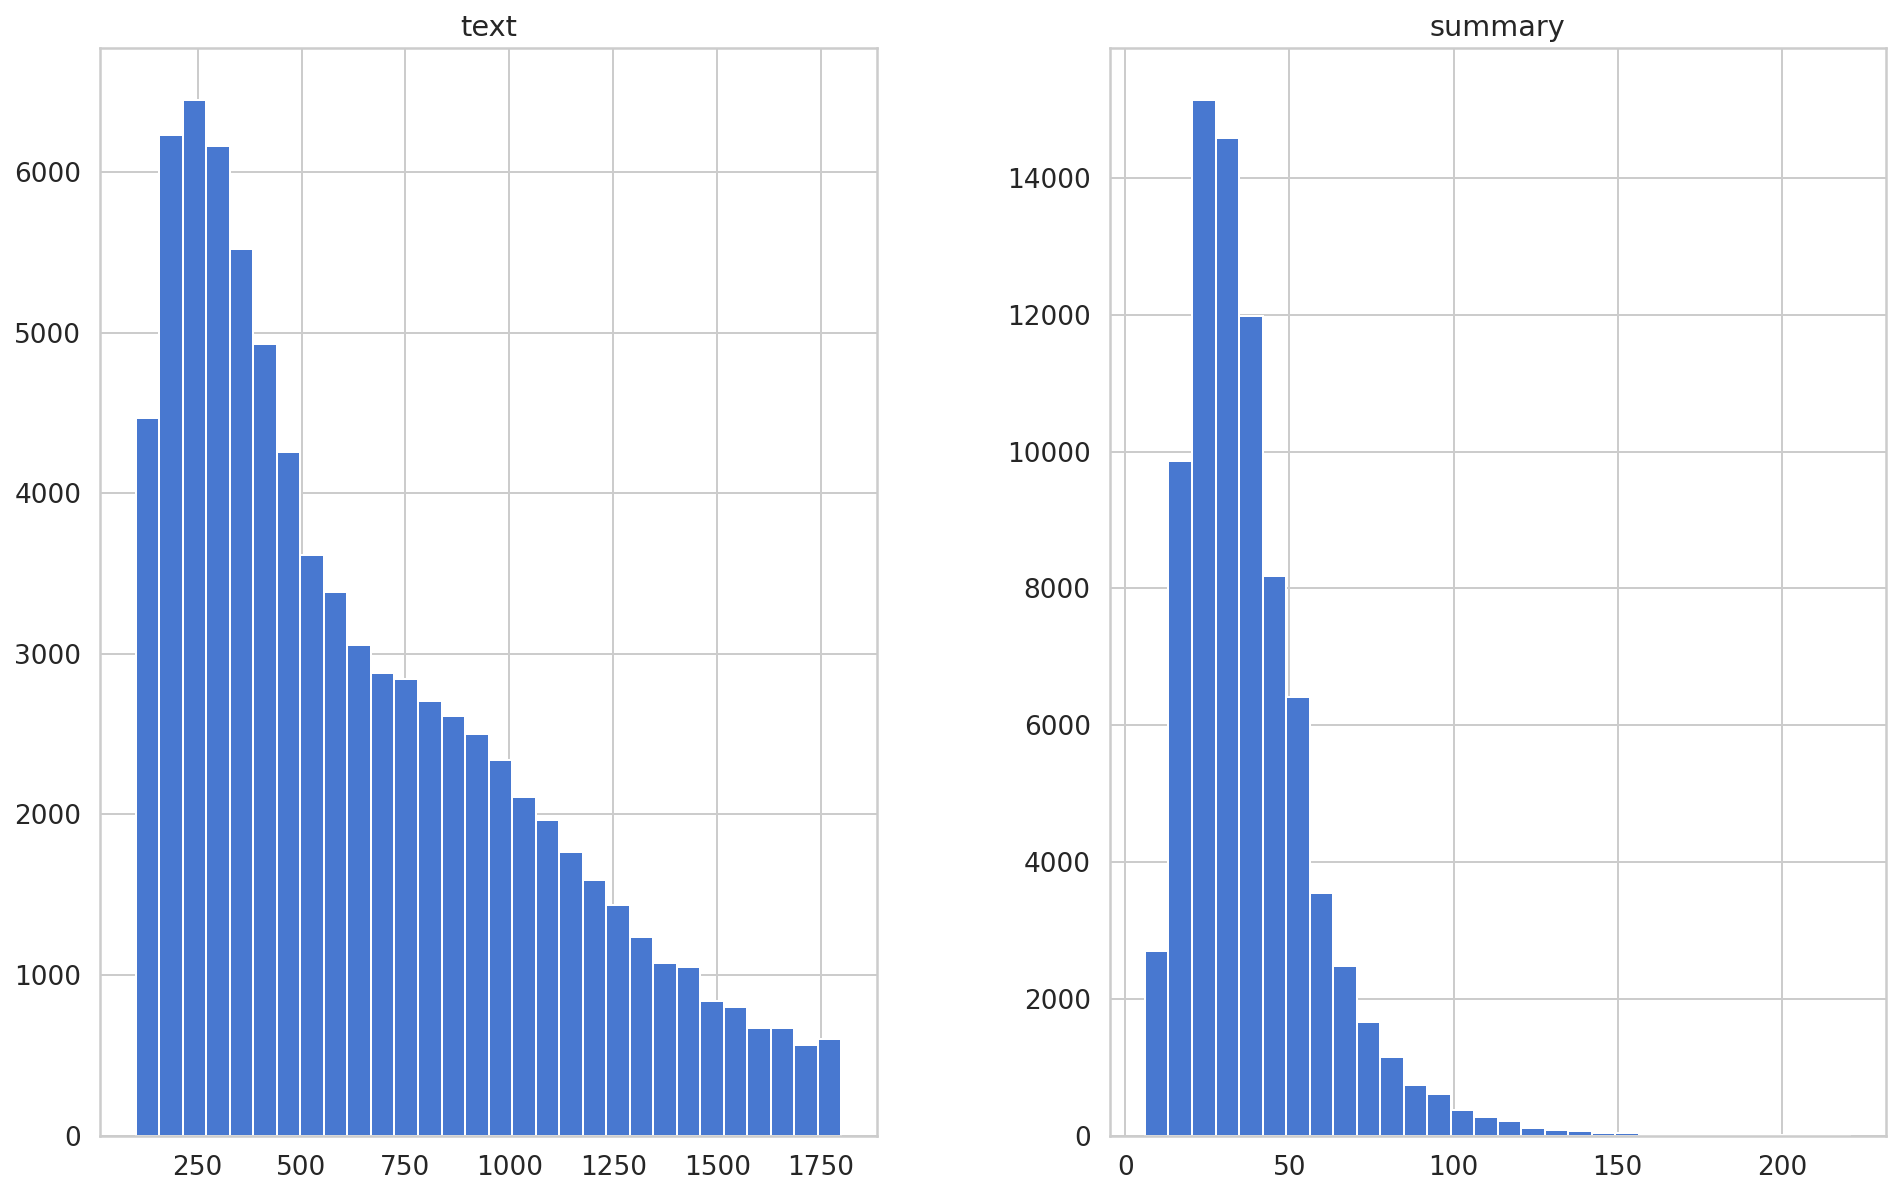

In [53]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train_df['News']:
      text_word_count.append(len(word_tokenize(i)))

for i in train_df['Summarization']:
      summary_word_count.append(len(word_tokenize(i)))

length_data = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_data.hist(bins = 30)
plt.show()

## BBC

### download

In [54]:
!gdown --id 1QYGCHWqANP0eepD0h6Flrkc7McWgJmBq

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1QYGCHWqANP0eepD0h6Flrkc7McWgJmBq
To: /content/BBC_data.zip
100% 95.3M/95.3M [00:04<00:00, 20.8MB/s]


In [55]:
!unzip "BBC_data.zip" 

Archive:  BBC_data.zip
  inflating: persian_train.jsonl     
  inflating: persian_test.jsonl      
  inflating: persian_val.jsonl       


### read data

In [56]:
BBC_train = pd.read_json('persian_train.jsonl', lines=True)
BBC_test =  pd.read_json('persian_test.jsonl', lines=True)
BBC_val =  pd.read_json('persian_val.jsonl', lines=True)

BBC_train.reset_index(drop=True, inplace=True)
BBC_test.reset_index(drop=True, inplace=True)
BBC_val.reset_index(drop=True, inplace=True)

BBC_df = pd.concat( [BBC_train, BBC_test, BBC_val], axis=0) 

In [57]:
BBC_df.head()

id  \
0          060806_si-philippine-volcano   
1                     magazine-46419125   
2  130309_mgh_magazine_women_rule_world   
3        131021_ram_afg_candidates_list   
4                         arts-43893781   

                                                                                url  \
0  https://www.bbc.com/persian/worldnews/story/2006/08/060806_si-philippine-volcano   
1                                     https://www.bbc.com/persian/magazine-46419125   
2    https://www.bbc.com/persian/world/2013/03/130309_mgh_magazine_women_rule_world   
3    https://www.bbc.com/persian/afghanistan/2013/11/131021_ram_afg_candidates_list   
4                                         https://www.bbc.com/persian/arts-43893781   

                                                    title  \
0                       آتشفشان فيليپين 'در آستانه فوران'   
1  جهان خودرو؛ معرفی نامزدهای بهترین ماشین سال ۲۰۱۹ اروپا   
2                                اگر زنان حاکم شوند . . .   
3           نامزدهای انتخابات ریاست جمهوری ۱۳۹۳ افغانستان   
4                    هزارتوی دل تورو؛ 'هیولا مذهب من است'   

                                                                                                                                                                                                                                                                                                                                                                   summary  \
0                                                                                                                                                                                                                                       مقام های فيليپين دستور تخليه حدودا 20 هزار نفر از ساکنان ناحيه اطراف يک آتشفشان را صادر کرده اند چرا که نگرانند به زودی فوران کند.   
1                                                                                                                      این هفته در جهان خودرو: معرفی نامزدهای رقابت برای کسب بهترین ماشین سال اروپا؛ رونمایی از نسل جدید مزدا ۳؛ نمایش اولین سدان الکتریکی آئودی؛ معرفی نسل جدید پورشه ۹۱۱؛ اولین ماشین با سیستم عامل آندروید و تعطیلی کارخانه‌های جنرال موتورز در آمریکا.   
2  تا همین چند وقت پیش، این ایده که شاید روزی زنان زمامدار امور جهان شوند، خنده‌دار، غیرواقعی و چیزی شبیه وقایع داستان‌های علمی-تخیلی به نظر می‌رسید. دی‌دی مایرز، تحلیلگر سیاسی که در دوره ریاست‌جمهوری بیل کلینتون در آمریکا از مسئولان روابط عمومی کاخ سفید بود، در این یادداشت می‌گوید که موضوع حکومت و زمامداری زنان، موضوعی است که می‌توان آن را خیلی جدی دنبال کرد.   
3                                                                                                                                                                   عبدالله عبدالله، در دوره دوم ریاست جمهوری آقای کرزی به صف مخالفان سیاسی او پیوست و ائتلافی موسوم به "تغییر و امید" را تشکیل داد. آقای عبدالله در دومین انتخابات ریاست جمهوری، رقیب اصلی آقای کرزی بود.   
4                                                                                                                    گیرمو دل تورو، که امسال با فیلم "شکل آب" جوایز اسکار و گلدن گلوب را درو کرد، جایی گفته بود هیولاها مذهب او هستند. گیرمو سال‌ها پیش، در تنهایی اتاق کودکی‌اش، با هیولاها عهد وفاداری بسته بود، وقتی هنوز در گهواره می‌خوابید و دو سه سالی بیشتر نداشت.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [58]:
BBC_df.shape

(59063, 5)

### rename columns and remove nan and duplicate

In [59]:
BBC_df = BBC_df[['text', 'summary']]
BBC_df = BBC_df.dropna()
BBC_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
BBC_df.dropna(axis=0,inplace=True)   #dropping na

In [60]:
BBC_df.shape

(58970, 2)

### cleaning

In [61]:
BBC_df['cleaned_text'] = BBC_df['text'].apply(lambda t: clean_text(t))
BBC_df['cleaned_summary'] = BBC_df['summary'].apply(lambda t: clean_text(t))

### Calculate number of words in text and summary

In [62]:
BBC_df["News_Length"] = BBC_df["cleaned_text"].apply(lambda sent: len(word_tokenize(sent)))
BBC_df["Summarization_Length"] = BBC_df["cleaned_summary"].apply(lambda sent: len(word_tokenize(sent)))

## statistical info

In [63]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(word_tokenize(d)) for d in longs)
    length_shorts = list(len(word_tokenize(d)) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(BBC_df['cleaned_summary'].to_list(), BBC_df['cleaned_text'].to_list(), 90)

percentile 90 of length of news: 1286.0
longest sentence:  26573

percentile 90 of length of summaries: 54.0
longest sentence:  394



### Remove rows which number of words in summary are greater then the number of text words.

In [64]:
data_clean = BBC_df[(BBC_df["News_Length"] > 100) & 
                          (BBC_df["News_Length"] < 1200) & 
                          (BBC_df["Summarization_Length"] > 5) &
                          (BBC_df["Summarization_Length"] < BBC_df["News_Length"])]

In [65]:
train_df = data_clean[['cleaned_text', 'cleaned_summary','News_Length','Summarization_Length']]
train_df.columns = ['News', 'Summarization','News_Length','Summarization_Length']

### save data

In [66]:
train_df.to_csv('BBC.csv')

In [67]:
!zip -r "/content/GoogleDrive/MyDrive/Arshad/NLP/Final_Project/BBC-Finalized-Data" "/content/BBC-Finalized-Data"

	zip warning: name not matched: /content/BBC-Finalized-Data

zip error: Nothing to do! (try: zip -r /content/GoogleDrive/MyDrive/Arshad/NLP/Final_Project/BBC-Finalized-Data . -i /content/BBC-Finalized-Data)


### chart for data

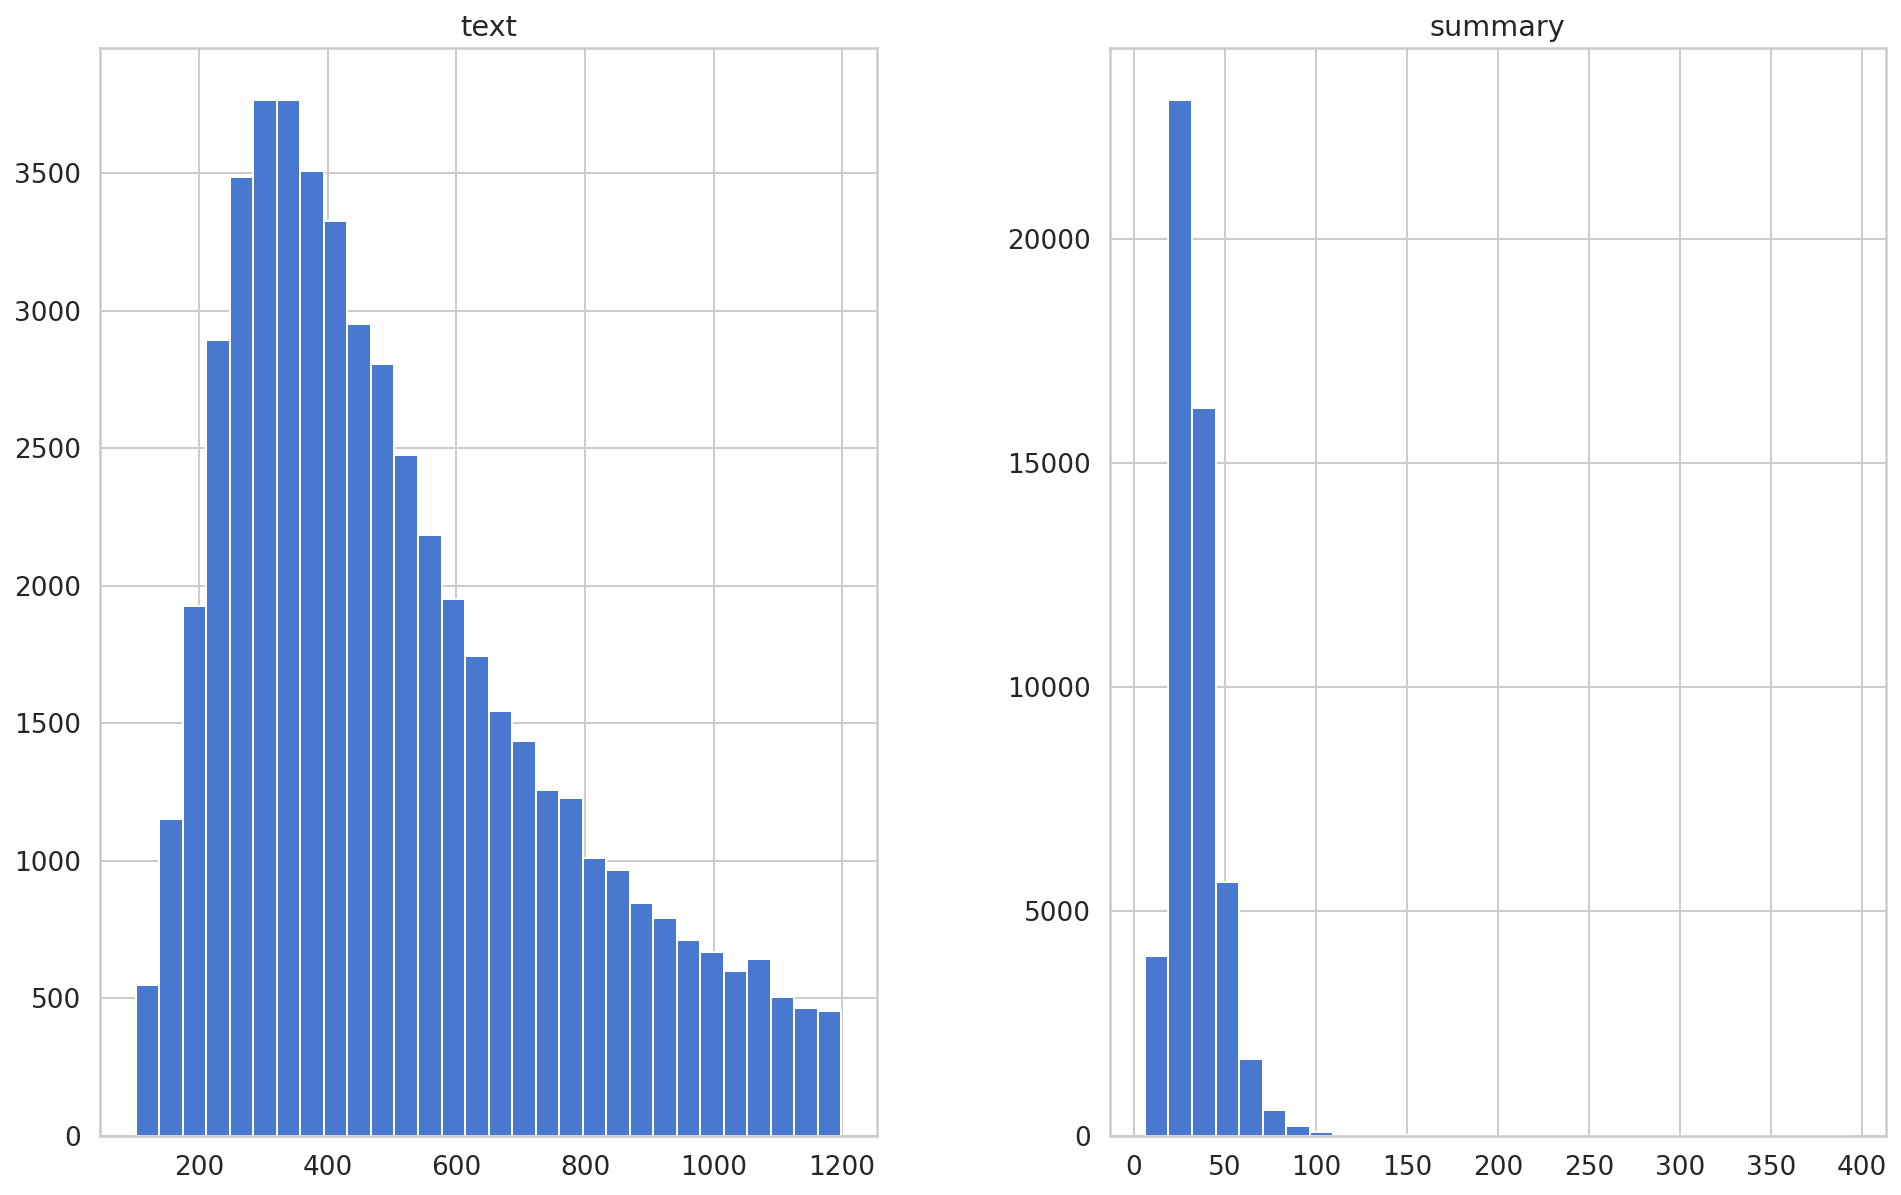

In [68]:

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train_df['News']:
      text_word_count.append(len(word_tokenize(i)))

for i in train_df['Summarization']:
      summary_word_count.append(len(word_tokenize(i)))

length_data = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_data.hist(bins = 30)
plt.show()

## Pn-summary

### download

In [69]:
!gdown --id 1Q1D0pY9He2mPvGd-I86gW7mIuNcU7xpu

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Q1D0pY9He2mPvGd-I86gW7mIuNcU7xpu
To: /content/pn_summary.zip
100% 89.6M/89.6M [00:04<00:00, 18.7MB/s]


In [70]:
!unzip "pn_summary.zip" 

Archive:  pn_summary.zip
   creating: pn_summary/
  inflating: pn_summary/dev.csv      
  inflating: pn_summary/train.csv    
  inflating: pn_summary/test.csv     


### read data

In [71]:
pn_train = pd.read_csv('pn_summary/train.csv',sep='\t')
pn_test = pd.read_csv('pn_summary/test.csv',sep='\t')
pn_val = pd.read_csv('pn_summary/dev.csv',sep='\t')

pn_train.reset_index(drop=True, inplace=True)
pn_test.reset_index(drop=True, inplace=True)
pn_val.reset_index(drop=True, inplace=True)

pn_df = pd.concat( [pn_train, pn_test, pn_val], axis=0) 

In [77]:
pn_df.head()

,id,title,article,summary,category,categories,network,link
0,738e296491f8b24c5aa63e9829fd249fb4428a66,مدیریت فروش نفت در دوران تحریم هوشمندانه عمل کرد,به گزارش شانا، علی کاردر امروز (۲۷ دی ماه) در مراسم تودیع محسن قمصری، مدیر سابق امور بین الملل شرکت ملی نفت ایران و معارفه سعید خوشرو، مدیر جدید امور بین الملل این شرکت، گفت: مدیریت امور بین‎الملل به عنوان یکی از تاثیرگذارترین مدیریت‌های شرکت ملی نفت ایران در دوران تحریم‌های ظالمانه غرب علیه کشورمان بسیار هوشمندانه عمل کرد و ما توانستیم به خوبی از عهده تحریم‌ها برآییم. [n] وی افزود: مجموعه امور بین الملل در همه دوران‌ها با سختی‌ها و مشکلات بسیاری مواجه بوده است، به ویژه در دوره اخیر به دلیل مسائل پیرامون تحریم وظیفه سنگینی بر عهده داشت که با تدبیر مدیریت خوب این مجموعه سربلند از آن بیرون آمد. [n] کاردر با قدردانی از زحمات محسن قمصری، به سلامت مدیریت امور بین الملل این شرکت اشاره کرد و افزود: محوریت کار مدیریت اموربین الملل سلامت مالی بوده است. [n] وی بر ضرورت نهادینه سازی جوانگرایی در مدیریت شرکت ملی نفت ایران تاکید کرد و گفت: مدیریت امور بین الملل در پرورش نیروهای زبده و کارآزموده آنچنان قوی عملکرده است که برای انتخاب مدیر جدید مشکلی وجود نداشت. [n] کاردر، حرفه‎ای‎گری و کار استاندارد را از ویژگی‌های مدیران این مدیریت برشمرد و گفت: نگاه جامع، خلاقیت و نوآوری و بکارگیری نیروهای جوان باید همچنان مد نظر مدیریت جدید امور بین الملل شرکت ملی نفت ایران باشد.,مدیرعامل شرکت ملی نفت، عملکرد مدیریت امور بین‎الملل این شرکت را در دوران تحریم بسیار هوشمندانه خواند و گفت: امور بین الملل در دوران پس از تحریم‎ها نیز می‌تواند نقش بزرگی در تسریع روند توسعه داشته باشد.,Oil-Energy,نفت,Shana,https://www.shana.ir/news/275284/%D9%85%D8%AF%DB%8C%D8%B1%DB%8C%D8%AA-%D9%81%D8%B1%D9%88%D8%B4-%D9%86%D9%81%D8%AA-%D8%AF%D8%B1-%D8%AF%D9%88%D8%B1%D8%A7%D9%86-%D8%AA%D8%AD%D8%B1%DB%8C%D9%85-%D9%87%D9%88%D8%B4%D9%85%D9%86%D8%AF%D8%A7%D9%86%D9%87-%D8%B9%D9%85%D9%84-%DA%A9%D8%B1%D8%AF
1,00fa692a178a2454419284199df6b6690a75ade0,سبد محصولات پتروشیمی متنوع می‌شود,به گزارش شانا به نقل از شرکت ملی صنایع پتروشیمی، علی‌اصغر گودرزی‌فراهانی با اشاره به اینکه همه طرح‌های در حال اجرای صنعت پتروشیمی براساس پیشرفت فیزیکی و پیش‌بینی زمان راه‌اندازی در قالب طرح‌های جهش دوم و سوم تقسیم‌بندی شده‌اند، اظهار کرد: انتظار داریم که طرح‌های جهش دوم صنعت پتروشیمی که پیشرفت‌های بسیار خوبی نیز دارند تا پایان سال ۱۴۰۰ و در واقع تا پایان برنامه ششم توسعه به نتیجه برسند که براساس آن ظرفیت تولید صنعت پتروشیمی به ۱۰۰ میلیون تن در سال می‌رسد. [n] وی با اشاره به پیشرفت بسیار مطلوب بعضی از طرح‌های جهش سوم صنعت پتروشیمی، افزود: براساس برنامه‌ریزی انجام شده تا پایان سال ۱۴۰۴، جهش سومی در مقدار تولید محصولات پتروشیمی رخ می‌دهد که با تحقق آن ظرفیت تولید کحصولات پتروشیمی به سالانه ۱۳۳ میلیون تن خواهد رسید. [n] سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنایع پتروشیمی با اشاره به اینکه تنوع محصولات پتروشیمی پس از بهره‌برداری از طرح‌های جهش دوم و سوم پتروشیمی افزایش قابل ملاحظه‌ای خواهد داشت، ادامه داد: تامین نیاز داخل در اولویت شرکت ملی صنایع پتروشیمی است و پس از تحقق این جهش‌ها می‌توان محصولات وارداتی با مصرف بالا را در داخل تولید کرد. [n] گودرزی‌فراهانی تصریح کرد: شرکت ملی صنایع پتروشیمی افزون بر دریافت خوراک از بالادست و تکمیل زنجیره و جلوگیری از خام‌فروشی، برای متنوع‌ کردن سبد محصولات صنعت پتروشیمی و تکمیل زنجیره ارزش نیز گام برمی دارد. [n] وی با اشاره به اینکه تعداد محصولات اصلی تولیدی از ۹۰ محصول کنونی به ۱۰۵ محصول در پایان سال ۱۴۰۴ می‌رسد، گفت:: با متنوع‌ کردن محصولات سبد پتروشیمی، مواد اولیه مورد نیاز صنایع پایین‌دست پتروشیمی نیز تامین می‌شود و و نیاز داخل به بعضی از محصولات مانند آکریلونیتریل که هم‌اکنون وارد می‌شود، تامین خواهد شد. [n] سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنایع پتروشیمی با اشاره به برنامه‌های این شرکت برای مجتمع‌های پتروشیمی، گفت: ۲ برنامه برای مجتمع‌های پتروشیمی در دستور کار است؛ نخست تلاش می‌شود تولید مجتمع‌ها به ظرفیت اسمی برسند، دو اینکه از طرح‌های توسعه‌ای و ساخت واحدهای جدید با خوراک تولیدی خود مجتمع‌ها استقبال می‌شود و برای صدور مجوز اجرای آنها سختگیری نخواهد شد.,سرپرست مدیریت برنامه‌ریزی و توسعه شرکت ملی صنایع پتروشیمی گفت: تنوع محصولات پتروشیمی ایران با بهره‌برداری از طرح‌های جهش دوم و سوم صنعت پتروشیمی افزایش می‌ی

In [73]:
pn_df.shape

(93207, 8)

### rename columns and remove nan and duplicate

In [80]:
pn_df = pn_df[['article', 'summary']]
pn_df.columns = ['text', 'summary']
pn_df = pn_df.dropna()
pn_df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
pn_df.dropna(axis=0,inplace=True)   #dropping na

In [81]:
pn_df.shape

(93207, 2)

### cleaning

In [82]:
pn_df['cleaned_text'] = pn_df['text'].apply(lambda t: clean_text(t))
pn_df['cleaned_summary'] = pn_df['summary'].apply(lambda t: clean_text(t))

### Calculate number of words in text and summary

In [83]:
pn_df["News_Length"] = pn_df["cleaned_text"].apply(lambda sent: len(word_tokenize(sent)))
pn_df["Summarization_Length"] = pn_df["cleaned_summary"].apply(lambda sent: len(word_tokenize(sent)))

## statistical info

In [84]:
# because there are senteces with unusually long lengths, 
# we caculate the max length that 95% of sentences are shorter than that
def max_length(shorts, longs, prct):
    # Create a list of all the captions
    
    length_longs = list(len(word_tokenize(d)) for d in longs)
    length_shorts = list(len(word_tokenize(d)) for d in shorts)

    print('percentile {} of length of news: {}'.format(prct,np.percentile(length_longs, prct)))
    print('longest sentence: ', max(length_longs))
    print()
    print('percentile {} of length of summaries: {}'.format(prct,np.percentile(length_shorts, prct)))
    print('longest sentence: ', max(length_shorts))
    print()
    return int(np.percentile(length_longs, prct)),int(np.percentile(length_shorts, prct))

# selecting sentence length based on the percentile of data that fits in the length
max_len_news, max_len_summary= max_length(pn_df['cleaned_summary'].to_list(), pn_df['cleaned_text'].to_list(), 90)

percentile 90 of length of news: 621.0
longest sentence:  5449

percentile 90 of length of summaries: 48.0
longest sentence:  212



### Remove rows which number of words in summary are greater then the number of text words.

In [85]:
data_clean = pn_df[(pn_df["News_Length"] > 100) & 
                          (pn_df["News_Length"] < 800) & 
                          (pn_df["Summarization_Length"] > 5) &
                          (pn_df["Summarization_Length"] < pn_df["News_Length"])]

In [86]:
train_df = data_clean[['cleaned_text', 'cleaned_summary','News_Length','Summarization_Length']]
train_df.columns = ['News', 'Summarization','News_Length','Summarization_Length']

### Save data

In [88]:
train_df.to_csv('pn.csv')

### chart for data

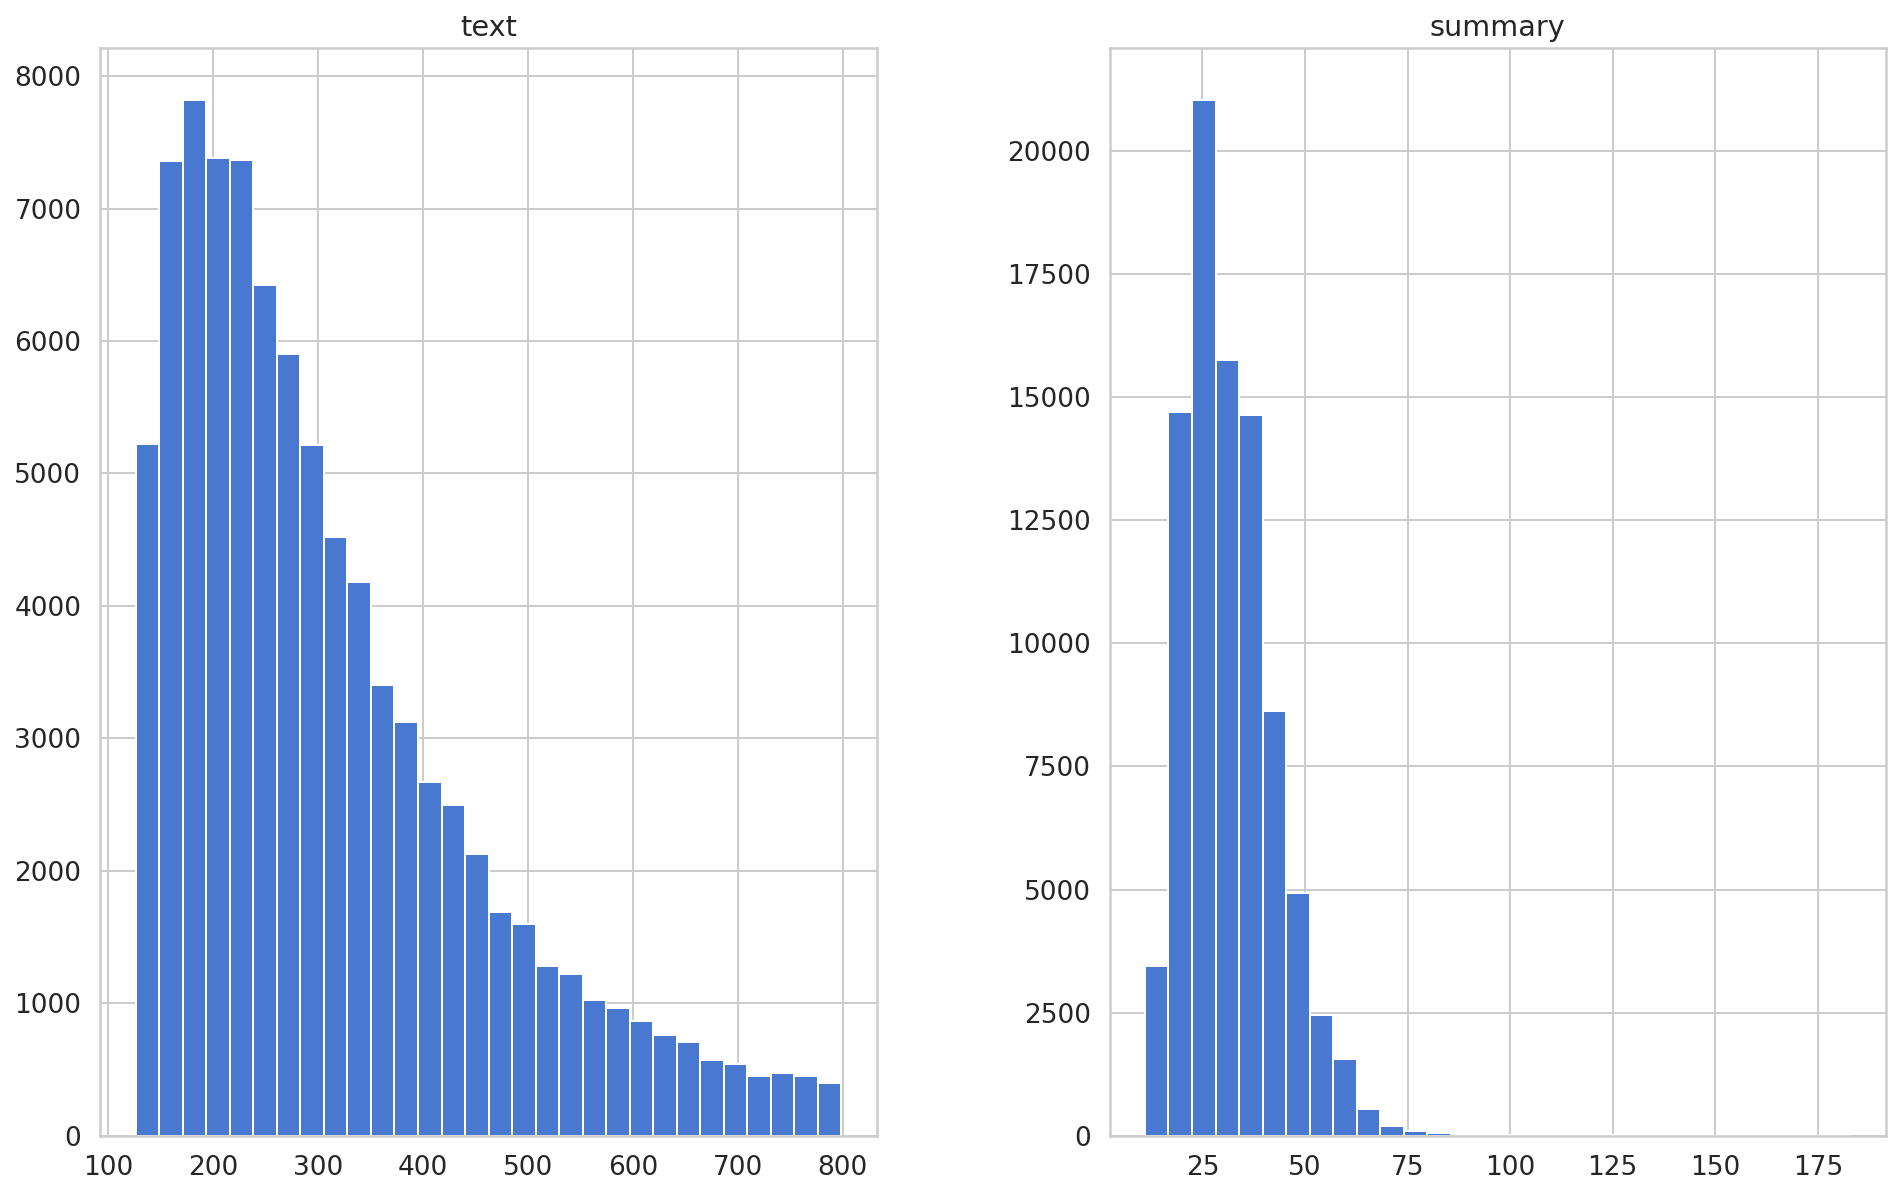

In [89]:

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in train_df['News']:
      text_word_count.append(len(word_tokenize(i)))

for i in train_df['Summarization']:
      summary_word_count.append(len(word_tokenize(i)))

length_data = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_data.hist(bins = 30)
plt.show()